# SARIMAX
- The (extended) ARIMA family of methods is too big to be properly explained in this course.
    - At NMBU, the course DAT320 goes deeper.
    - An online book with videos: [Forecasting: Principles and Practice](https://otexts.com/fpp3/).
- We therefore skip (almost) directly to the regression models and their usage.  
  
__Stationarity:__
- The distribution of the time series is independent of which part of the time series you look at.
    - Trends, seasonality (cycles of fixed width) and changes in variance lead to non-stationarity.
    - Differencing (first or second order discrete derivatives) can help.
        - Seasonal differencing means the difference is not between neighbours but higher lags.
- If the data is not stationary, pre-processing or modelling of the specific deviations from stationarity is needed.

## Wholesale price index (WPI) data
- We will illustrate some concepts and models using the WPI data.

In [6]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

# Load Wholesale price index (WPI) data
wpi1 = requests.get('https://www.stata-press.com/data/r12/wpi1.dta').content
data = pd.read_stata(BytesIO(wpi1))
data.index = data.t
data['ln_wpi'] = np.log(data['wpi'])
data['D.ln_wpi'] = data['ln_wpi'].diff()
# Set the frequency
data.index.freq="QS-OCT"
data.head()

,wpi,t,ln_wpi,D.ln_wpi
t,,,,
1960-01-01,30.700001,1960-01-01,3.424263,NaN
1960-04-01,30.799999,1960-04-01,3.427515,0.003252
1960-07-01,30.700001,1960-07-01,3.424263,-0.003252
1960-10-01,30.700001,1960-10-01,3.424263,0.000000
1961-01-01,30.799999,1961-01-01,3.427515,0.003252


## Autocorrleation
- [Autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation) is the correlation between a stationary timeseries and a lagged version of itself.
    - This is a measure of the time dependence in the series, i.e., lack of independence.
    - Can be used to indicate the appropriate lag in moving average (MA) models.
- [Partial autocorrelation](https://en.wikipedia.org/wiki/Partial_autocorrelation_function) is the autocorrelation when controlling for (regressed on) all intermediate time lags.
    - Can be used to indicate the appropriate lag in autogregressive (AR) models.

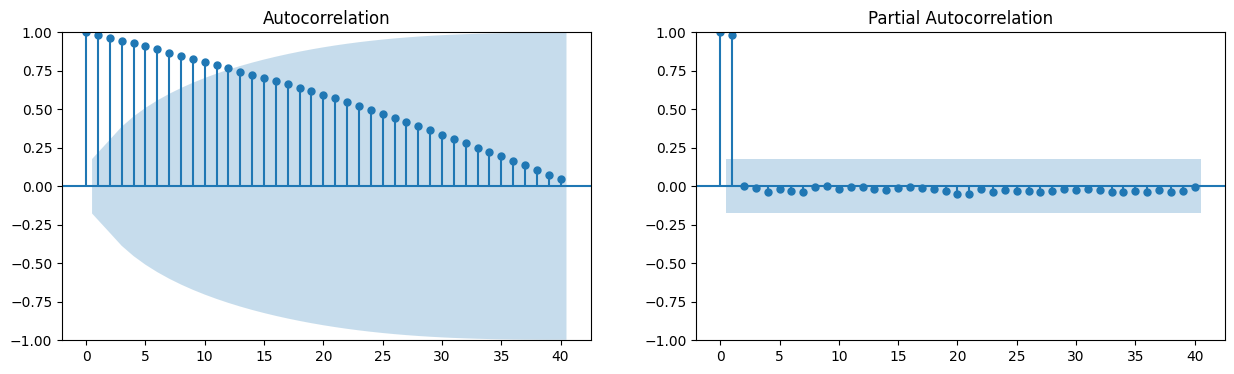

In [9]:
# Autocorrelation and partial autocorrelation plots (raw data)
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['wpi'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['wpi'], lags=40, ax=axes[1])

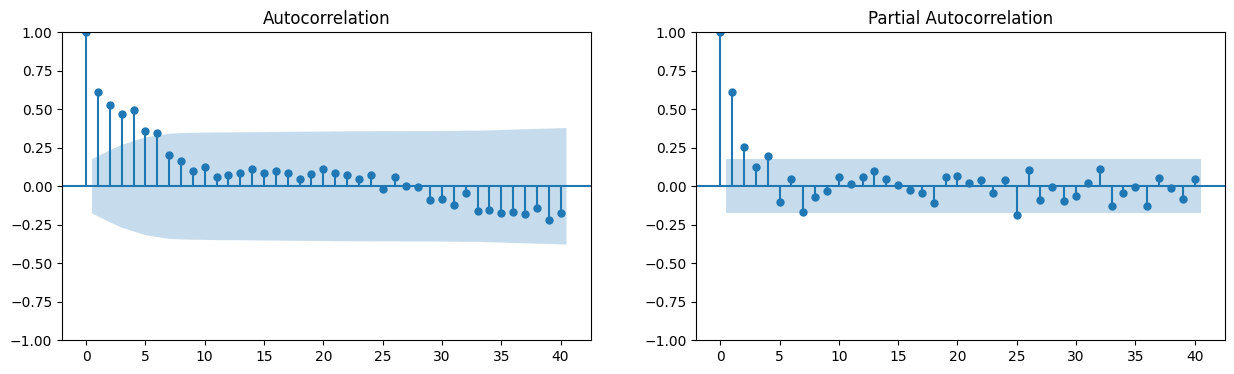

In [8]:
# Autocorrelation and partial autocorrelation plots 
# after applying the logarithm and differencing
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['D.ln_wpi'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['D.ln_wpi'], lags=40, ax=axes[1])

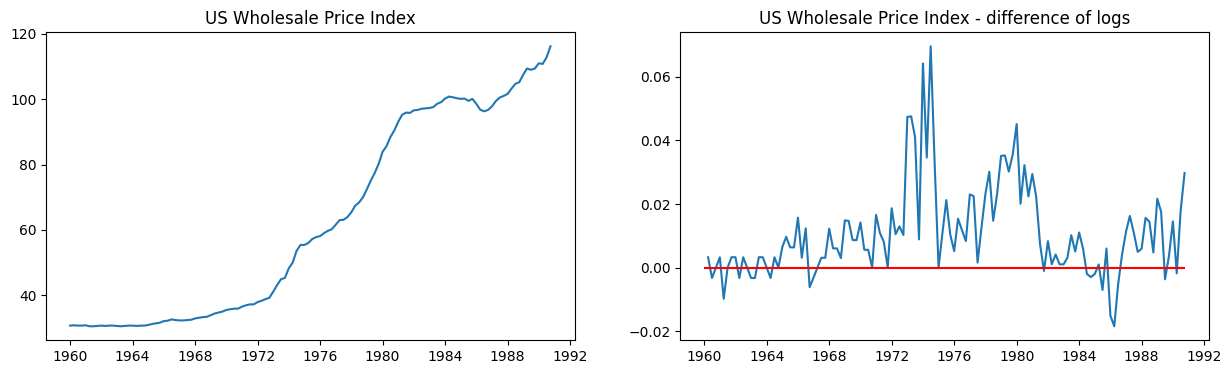

In [4]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

# Levels
axes[0].plot(data.index._mpl_repr(), data['wpi'], '-')
axes[0].set(title='US Wholesale Price Index')

# Log difference
axes[1].plot(data.index._mpl_repr(), data['D.ln_wpi'], '-')
axes[1].hlines(0, data.index[0], data.index[-1], 'r')
axes[1].set(title='US Wholesale Price Index - difference of logs');

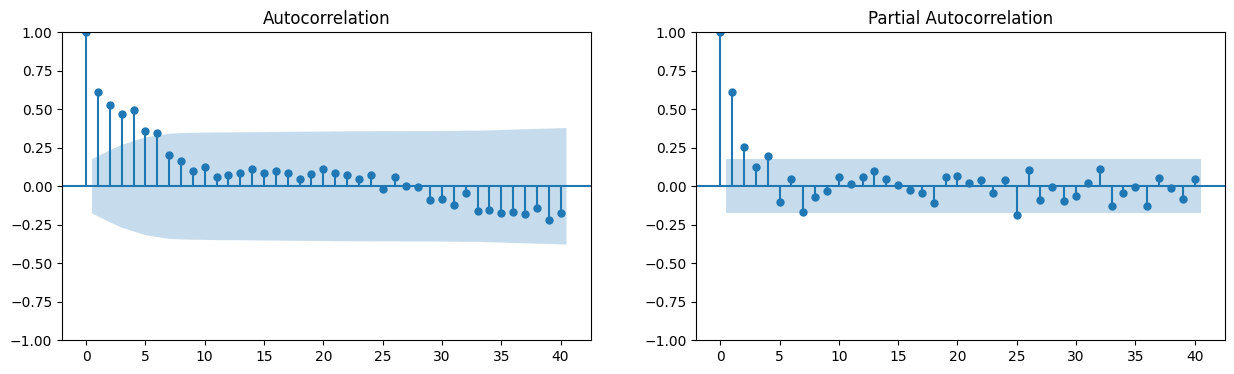

In [5]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['D.ln_wpi'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['D.ln_wpi'], lags=40, ax=axes[1])

Following the notation used in [stasmodels SARIMAX example](https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_sarimax_stata.html) we have the following equation and symbols:  

The ARMA model is a linear regression model that uses past values of the time series as predictors (two equivalent formulations):  
$$
\Delta y_t = c + \phi_1 \Delta y_{t-1} + \theta_1 \epsilon_{t-1} + \epsilon_{t}
$$
$$
(1 - \phi_1 L ) \Delta y_t = c + (1 + \theta_1 L) \epsilon_{t}
$$

SARIMA model:
$$
\phi_p (L) \tilde \phi_P (L^s) \Delta^d \Delta_s^D y_t = A(t) + \theta_q (L) \tilde \theta_Q (L^s) \epsilon_t
$$

SARIMAX model:  
$$
y_t = \beta_t x_t + u_t \\
        \phi_p (L) \tilde \phi_P (L^s) \Delta^d \Delta_s^D u_t = A(t) +
            \theta_q (L) \tilde \theta_Q (L^s) \epsilon_t
$$  

- $\phi_p (L)$ is the non-seasonal autoregressive lag polynomial
- $\tilde \phi_P (L^s)$ is the seasonal autoregressive lag polynomial
- $\Delta^d \Delta_s^D y_t$ is the time series, differenced $d$ times, and seasonally differenced $D$ times.
- $A(t)$ is the trend polynomial (including the intercept)
- $\theta_q (L)$ is the non-seasonal moving average lag polynomial
- $\tilde \theta_Q (L^s)$ is the seasonal moving average lag polynomial
- $\epsilon_{t} \sim N(0, \sigma^2)$ is an error term

## Resources
- [Book and video lecutres on Forecasting: Principles and Practice](https://otexts.com/fpp3/)
- [stasmodels SARIMAX example](https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_sarimax_stata.html)